## Лабораторная работа 3. Визуализация данных.

### Задание

- изучение основных типов графиков библиотеки matplotlib;
- изучение основных типов графиков библиотеки seaborn;
- получение навыков анализа данных по визуальным представлениям данных.

### Вариант 12

#### Загрузка данных

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data_path = "C:\\Users\\Mvideo\\mlda\\lab_03_12\\archive\\mushrooms.csv"
data = pd.read_csv(data_path)
data.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


Для удобства выведем все заголовки в виде списка с данными.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

#### Визуализация количественных признаков по классам

In [5]:
class_counts = data['class'].value_counts()
print(class_counts)

class
e    4208
p    3916
Name: count, dtype: int64


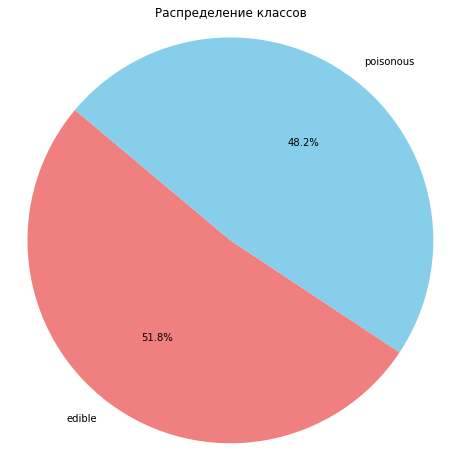

In [6]:
class_labels=['edible', 'poisonous']
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_labels, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'skyblue'])
plt.title("Распределение классов")
plt.axis('equal')
plt.show()

Отсортируем по относительной частоте появления каждого класса (съедобных и ядовитых грибов) в различных местах обитания. 

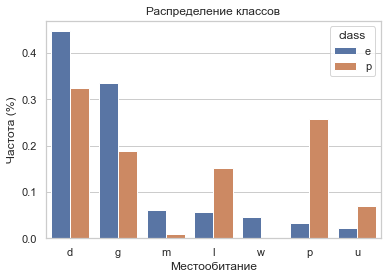

In [44]:
df_habitat = data['habitat'].groupby(data['class']).value_counts(normalize= True).rename('frequency').to_frame().reset_index()
sns.barplot(data = df_habitat,x='habitat',y='frequency',hue='class')
plt.xlabel('Местообитание')
plt.ylabel('Частота (%)')
plt.title("Распределение классов");

#### Визуализация категориальных признаков

In [8]:
df = data.describe(include='all').T.reset_index().sort_values('count')
df

,index,count,unique,top,freq
0,class,8124,2,e,4208
20,spore-print-color,8124,9,w,2388
19,ring-type,8124,5,p,3968
18,ring-number,8124,3,o,7488
17,veil-color,8124,4,w,7924
16,veil-type,8124,1,p,8124
15,stalk-color-below-ring,8124,9,w,4384
14,stalk-color-above-ring,8124,9,w,4464
13,stalk-surface-below-ring,8124,4,s,4936
12,stalk-surface-above-ring,8124,4,s,5176


Согласно таблице выводим значения для сортировки по шляпкам.

In [9]:
cap_counts = data['cap-shape'].value_counts()
print(cap_counts)

cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: count, dtype: int64


Имеем более двух типов, поэтому для наглядности используем столбчатую диаграмму и сортируем по количеству.

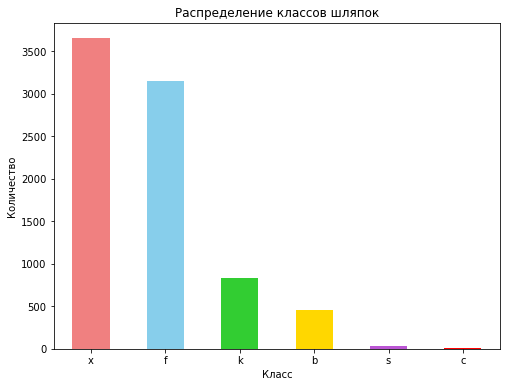

In [10]:
cap_counts = data['cap-shape'].value_counts()
plt.figure(figsize=(8, 6))
cap_counts.plot(kind='bar', color=['lightcoral', 'skyblue', 'limegreen', 'gold', 'mediumorchid', 'red'])
plt.title("Распределение классов шляпок")
plt.xlabel("Класс")
plt.ylabel("Количество")
plt.xticks(rotation=0)
plt.show()

Вывод: наиболее часто встречающийся вид шляпок - x. Наименее - c.

Сортируем по количеству колец у съедобых и несъедобных грибов.

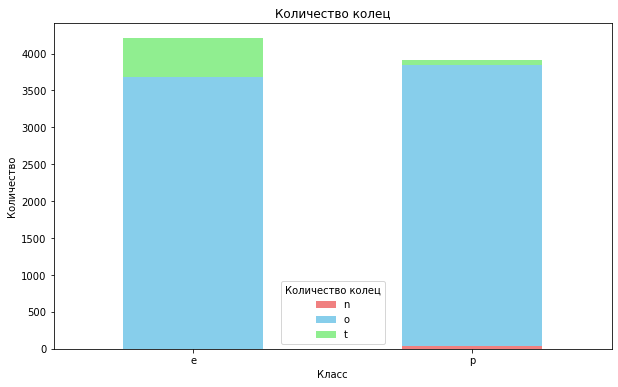

In [11]:
ring_counts = data.groupby('class')['ring-number'].value_counts().unstack().fillna(0)
ax = ring_counts.plot(kind='bar', stacked=True, color=['lightcoral', 'skyblue', 'lightgreen'], figsize=(10, 6))
plt.title("Количество колец")
plt.xlabel("Класс")
plt.ylabel("Количество")
plt.xticks(rotation=0)
plt.legend(title="Количество колец")
plt.show()

Можем наблюдать зависимость относительно количества колец типа t. Он наиболее часто встречается у съедобных грибов.

Сравним поверхности шляпок у грибов.

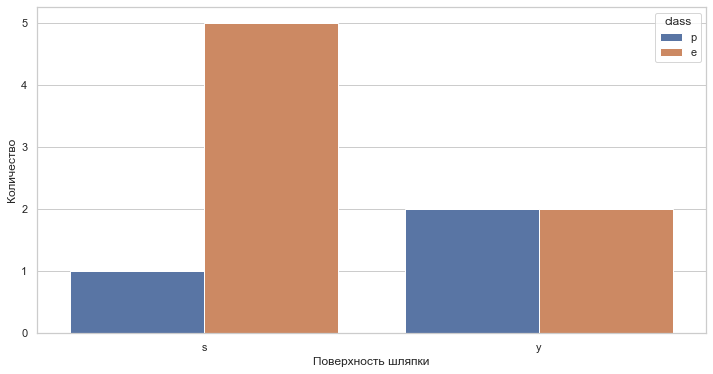

In [34]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))  # Устанавливаем размер графика
sns.countplot(x="cap-surface", hue="class", data=data.head(10))
plt.xlabel("Поверхность шляпки")
plt.ylabel("Количество")
plt.show()

Тип s наиболее распространен среди съедобных грибов.

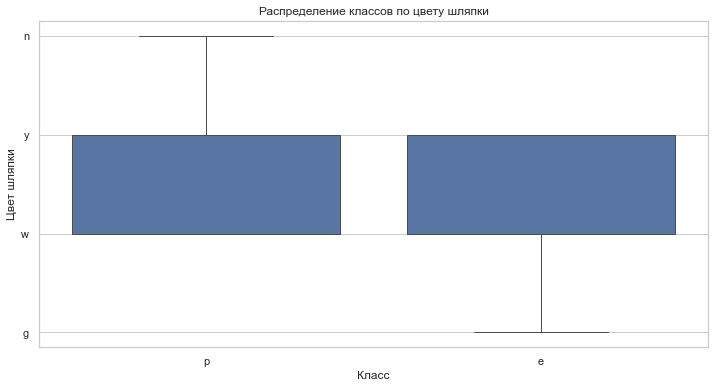

In [36]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="class", y="cap-color", data=data.head(10))
plt.title("Распределение классов по цвету шляпки")
plt.xlabel("Класс")
plt.ylabel("Цвет шляпки")
plt.show()

Согласно графику можем определить какой тип пятен отличает съедобные грибы от несъедобных.

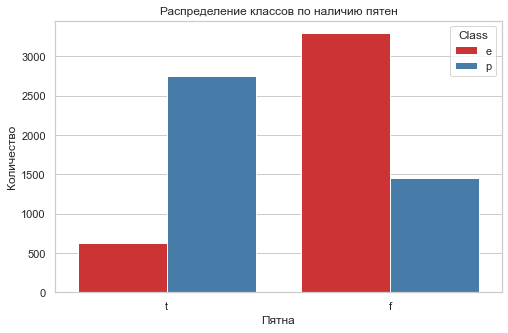

In [37]:
plt.figure(figsize=(8, 5))
sns.countplot(x="bruises", hue="class", data=data, palette="Set1")
plt.title("Распределение классов по наличию пятен")
plt.xlabel("Пятна")
plt.ylabel("Количество")
plt.legend(title="Class", loc="upper right", labels=["e", "p"])
plt.show()

Пятна типа t преобладают в съедобных грибах, f - в ядовитых.

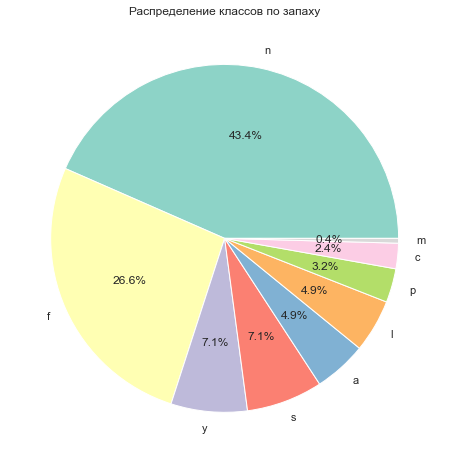

In [46]:
plt.figure(figsize=(8, 8))
odor_counts = data['odor'].value_counts()
plt.pie(odor_counts, labels=odor_counts.index, autopct='%1.1f%%', colors=sns.color_palette("Set3"))
plt.title("Распределение классов по запаху")
plt.show()

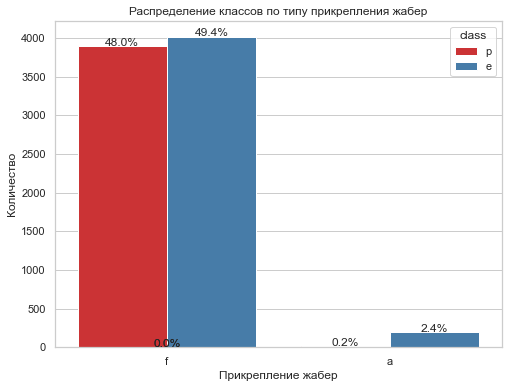

In [40]:
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
g = sns.countplot(x="gill-attachment", hue="class", data=data, palette="Set1")

total_samples = len(data)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x() + p.get_width() / 2, height + 3, f'{height/total_samples*100:.1f}%', ha="center")

plt.title("Распределение классов по типу прикрепления жабер")
plt.xlabel("Прикрепление жабер")
plt.ylabel("Количество")
plt.show()

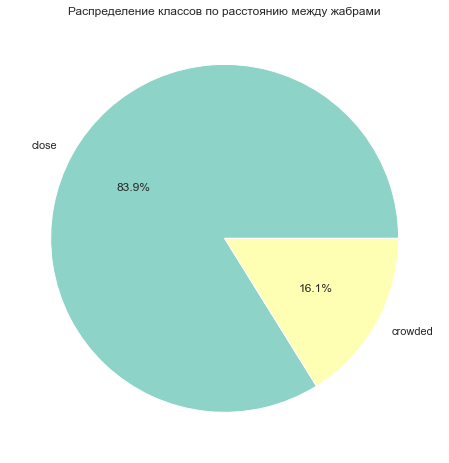

In [41]:
plt.figure(figsize=(8, 8))
spacing_counts = data['gill-spacing'].replace({'c': 'close', 'w': 'crowded', 'd': 'distant'}).value_counts()
plt.pie(spacing_counts, labels=spacing_counts.index, autopct='%1.1f%%', colors=sns.color_palette("Set3"))
plt.title("Распределение классов по расстоянию между жабрами")
plt.show()

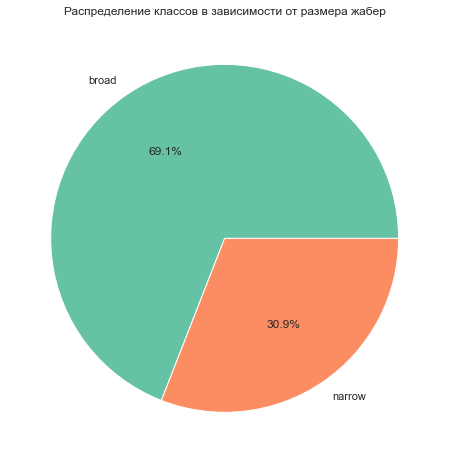

In [42]:
plt.figure(figsize=(8, 8))
size_counts = data['gill-size'].replace({'b': 'broad', 'n': 'narrow'}).value_counts()
plt.pie(size_counts, labels=size_counts.index, autopct='%1.1f%%', colors=sns.color_palette("Set2"))
plt.title("Распределение классов в зависимости от размера жабер")
plt.show()

Преобладает тип broad.

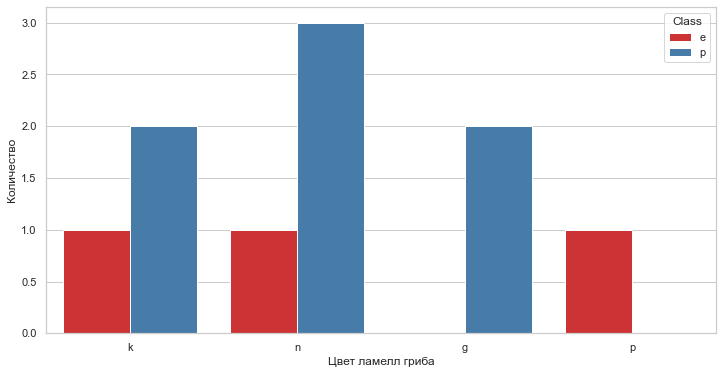

In [31]:
plt.figure(figsize=(12, 6))
sns.countplot(x='gill-color', hue='class', data=data.head(10), palette='Set1')
plt.xlabel('Цвет ламелл гриба')
plt.ylabel('Количество')
plt.legend(title='Class', loc='upper right', labels=['e', 'p'])
plt.show()

Наибольшее количество ламелл типов k, n, g наблюдается у ядовитых грибов, тип p у съедобных.

Вывод: наилучшее представление о ядовитости/съедобности гриба можно получить из категорий bruises и gill-color.